In [29]:
import os
import re
from collections import defaultdict
import matplotlib.pyplot as plt

In [30]:
root_path = os.path.normpath(os.getcwd() + os.sep + os.pardir)
data_path = os.path.join(root_path, "data")

In [37]:
experiments = os.listdir(data_path)
print(experiments)

['.DS_Store', 'logreg', 'log_linear_backward_directives', 'backward_pipeline_directives', 'addition_bmm', 'bert', 'abs', 'Samba-GEMM']


In [32]:
log_file_name = "jit-perf-v0.1.log"
pattern = re.compile(r'\[JITPerf\]')

In [33]:
def format_key(mapper, key):
    fmt = key
    if key in mapper.keys():
        fmt = key + '-' + mapper

In [61]:
def parse_data(exp):
    log_path = os.path.join(os.path.join(data_path, exp), log_file_name)
    with open(log_path) as f:
        lines = f.readlines()
        jit_perf_lines = [line for line in lines if re.match(pattern, line)]
        data = {line.split(' ')[1]: 0 for idx, line in enumerate(jit_perf_lines) }
        dist = {line.split(' ')[1]: data[line.split(' ')[1]] + float(line.split(' ')[2]) for idx, line in enumerate(jit_perf_lines) }
        timeline = {line.split(' ')[1] + '-' + str(idx): float(line.split(' ')[2]) for idx, line in enumerate(jit_perf_lines) }

    return dist, timeline

In [117]:
def _bar_chart(data):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    langs = data.keys()
    students = data.values()
    ax.bar(langs,students)
    plt.xticks(rotation=90)
    plt.show()

In [207]:
def _timeline_chart(data):
    import matplotlib.pyplot as plt
    import numpy as np
    from datetime import datetime
    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    
    names = [key.split('-')[0] if data[key] > 10e6 else '' for key in data.keys()]
    dates = [int(key.split('-')[1]) for key in data.keys()]    
    
    # Choose some nice levels
    levels = data.values()

    # Create figure and plot a stem plot with the date
    fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
    ax.set(title="events")

    ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
    ax.plot(dates, np.zeros_like(dates), "-,",
            color="k", markerfacecolor="w")  # Baseline and markers on it.

    # annotate lines
    for d, l, r in zip(dates, levels, names):
        ax.annotate(r, xy=(d, l),
                    xytext=(d, 0), textcoords="offset points",
                    horizontalalignment="right",
                    verticalalignment="top" if l > 0 else "top")

    ax.xaxis.set_major_locator(MultipleLocator(20))
    ax.xaxis.set_major_formatter('{x:.0f}')
    ax.xaxis.set_minor_locator(MultipleLocator(5))
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

    # remove y axis and spines
    ax.yaxis.set_visible(False)
    ax.spines[["left", "top", "right"]].set_visible(False)

    ax.margins(y=0.1)
    plt.xticks(rotation=90)
    plt.show()

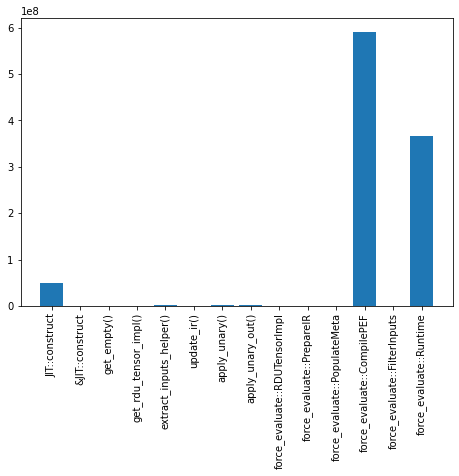

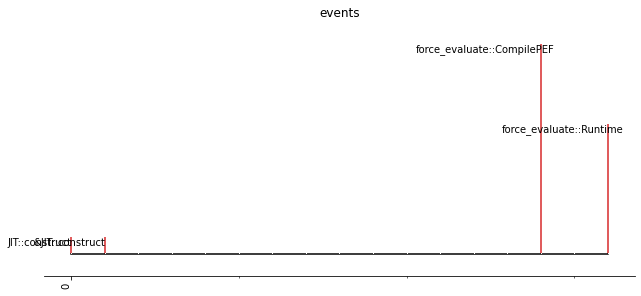

In [208]:
dist, timeline = parse_data("abs")
_bar_chart(dist)
_timeline_chart(timeline)

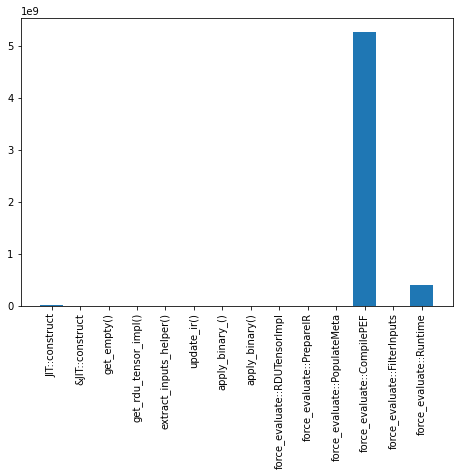

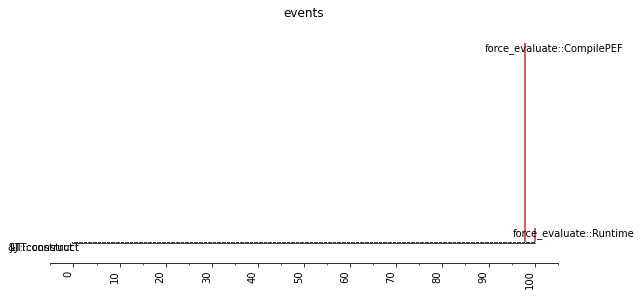

In [202]:
dist, timeline = parse_data("addition_bmm")
_bar_chart(dist)
_timeline_chart(timeline)

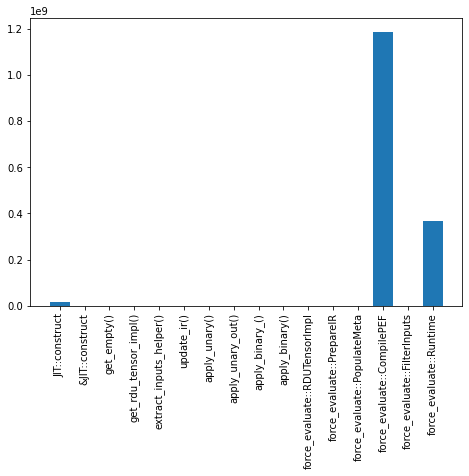

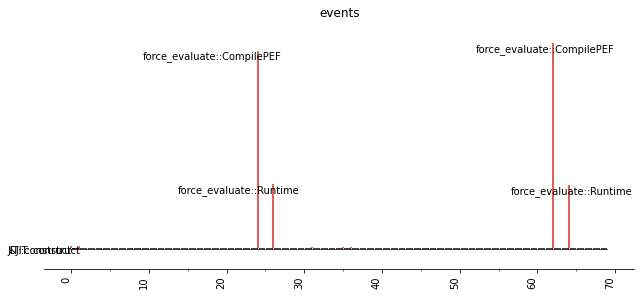

In [203]:
dist, timeline = parse_data("log_linear_backward_directives")
_bar_chart(dist)
_timeline_chart(timeline)

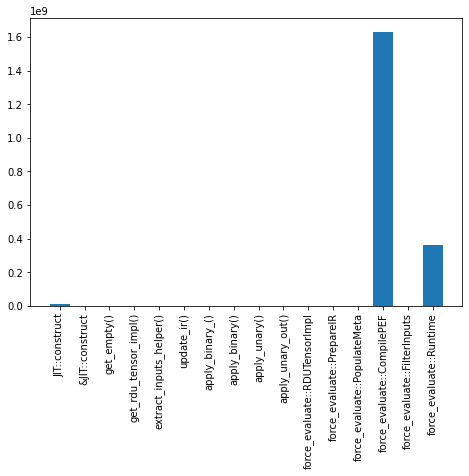

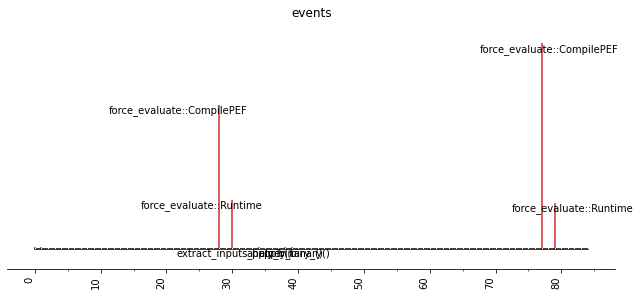

In [204]:
dist, timeline = parse_data("backward_pipeline_directives")
_bar_chart(dist)
_timeline_chart(timeline)

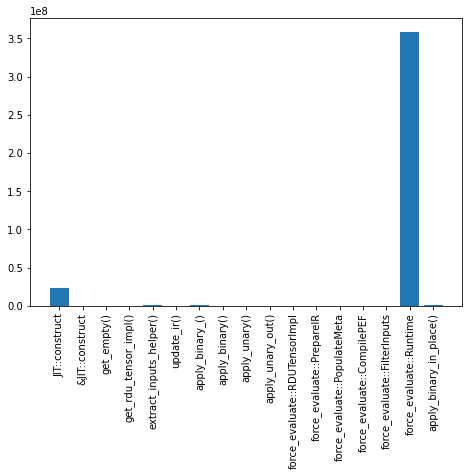

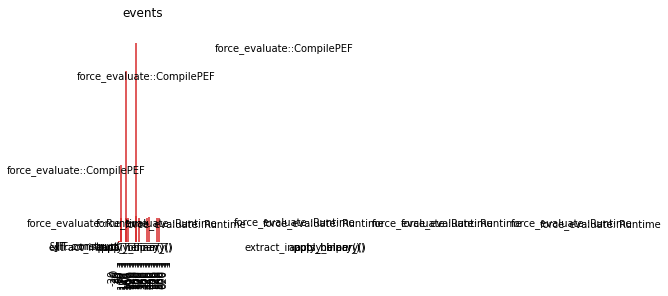

In [209]:
dist, timeline = parse_data("logreg")
_bar_chart(dist)
_timeline_chart(timeline)

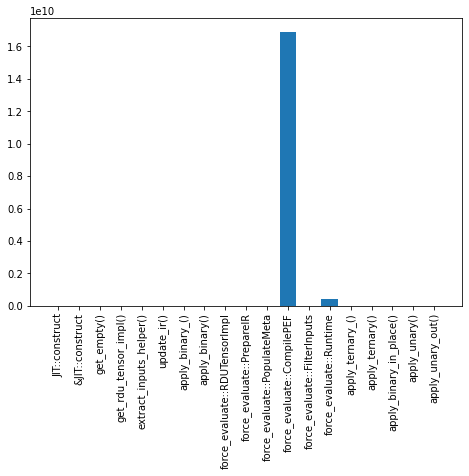

/opt/homebrew/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


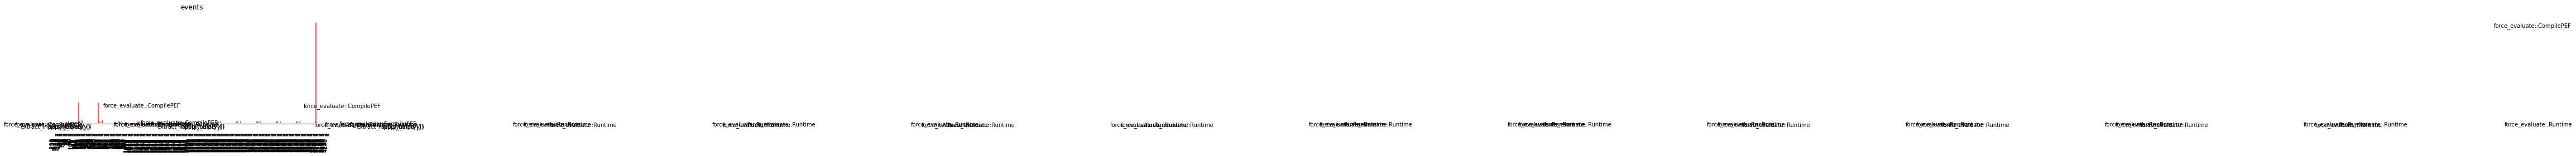

In [205]:
dist, timeline = parse_data("bert")
_bar_chart(dist)
_timeline_chart(timeline)